## Step 1: Installing Necessary Libraries
First, you'll need to install UMAP and Matplotlib. You can do this directly in your Jupyter notebook using the following command:

In [1]:
%pip install umap-learn matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2: Importing Libraries
Once installed, you can import the necessary libraries in your notebook:

In [2]:
import umap
import matplotlib.pyplot as plt
import numpy as np

/Users/mcevans/WebDev/PROJECTS/headspace/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Step 3: Creating Dummy Embedding Vectors
Let's create some dummy data. Since UMAP is typically used for reducing higher-dimensional data, we'll create a list of vectors where each vector is of length 5. We'll use NumPy for generating these vectors:

In [3]:
import numpy as np

# Define the number of points and dimensions
num_points = 100
vector_length = 5

# Number of clusters
num_clusters = 3

# Points per cluster
points_per_cluster = num_points // num_clusters

# Initialize an empty array for the data
dummy_data = np.empty((0, vector_length))

# Define different means for each cluster
means = [[0.2, 0.5, 0.8, 0.1, 0.3],  # Mean for cluster 1
         [0.7, 0.6, 0.1, 0.8, 0.9],  # Mean for cluster 2
         [0.4, 0.2, 0.9, 0.5, 0.7]]  # Mean for cluster 3

# Generate data for each cluster
for i in range(num_clusters):
    # Generate random data for this cluster around its mean
    cluster_data = np.random.randn(
        points_per_cluster, vector_length) * 0.1 + means[i]

    # Concatenate the cluster data to the main dataset
    dummy_data = np.vstack((dummy_data, cluster_data))

# Now, 'dummy_data' contains 100 points, each of 5 dimensions, with 3 distinct clusters

## Step 4: Applying UMAP for Dimensionality Reduction
UMAP will be used to reduce the 5-dimensional vectors into 2 dimensions for visualization purposes. Here's how you can do this:

In [4]:
# Initialize the UMAP object
reducer = umap.UMAP(n_components=2,random_state=42)

# Fit the model to your data and transform the data
# This reduces the dimensionality from 5 to 2
embedding = reducer.fit_transform(dummy_data)

# The 'embedding' variable now holds the 2D representation of your data

/Users/mcevans/WebDev/PROJECTS/headspace/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Step 5: Visualizing the Data with Matplotlib
Now, let's visualize the 2D representation created by UMAP:

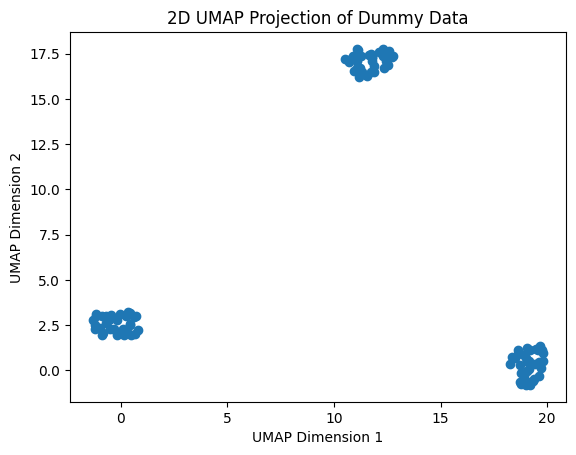

In [5]:
# Create a scatter plot of the 2D embedding
plt.scatter(embedding[:, 0], embedding[:, 1])

# Optionally, add labels and a title
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP Projection of Dummy Data')

# Display the plot
plt.show()

In [6]:
%pip install torch transformers


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
from transformers import AutoModel, AutoTokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
sample_text = [
    "Advancements in artificial intelligence are transforming the tech industry.",
    "The latest smartphone models feature incredibly advanced camera systems.",
    "Cybersecurity is a growing concern with the rise of digital banking.",
    "Virtual reality offers immersive experiences unlike anything in traditional gaming.",
    "Self-driving cars could revolutionize how we commute in the future.",
    "Blockchain technology is not just for cryptocurrencies but also for securing data.",
    "Tech startups are increasingly focusing on sustainable energy solutions.",
    "The Amazon rainforest is home to a diverse range of wildlife and plant species.",
    "Climate change is impacting global weather patterns and ecosystems.",
    "Hiking in the mountains is a great way to connect with nature.",
    "Conservation efforts are crucial for protecting endangered species.",
    "The beauty of the ocean is unmatched, but its health is in danger.",
    "Urban gardening is becoming popular in cities for sustainability.",
    "Observing the stars provides insights into the vastness of the universe.",
    "Restoring natural habitats helps maintain ecological balance.",
    "Cooking at home can be both fun and therapeutic.",
    "Exploring different cuisines is a journey into various cultures.",
    "Baking requires precision and patience, but the results are rewarding.",
    "Fresh ingredients make a significant difference in the flavor of dishes.",
    "The art of plating food is essential in fine dining experiences."
]

inputs = [tokenizer(text, return_tensors="pt",
                    truncation=True, max_length=512) for text in sample_text]
outputs = []
for i in inputs:
    with torch.no_grad():
        outputs.append(model(**i))

# Assuming you want the last hidden states (token-level embeddings)
embeddings = [output[0] for output in outputs]

# To access embeddings of the first sample
embeddings1 = embeddings[0]
embeddings[0]

tensor([[[ 0.3864,  0.2770, -0.3731,  ..., -0.1788,  0.0870,  0.2748],
         [ 0.0174,  0.3331, -0.0200,  ..., -0.2398,  0.5042,  0.1241],
         [ 0.6898,  0.1359, -0.1013,  ..., -0.3224,  0.2585, -0.0607],
         ...,
         [ 0.5960,  0.5854,  0.3574,  ..., -0.4544,  0.0283, -0.1506],
         [ 0.5079,  0.6034, -0.9316,  ..., -0.1446,  0.4718, -0.4244],
         [ 0.6415,  0.0545, -0.4683,  ...,  0.0541, -0.4921, -0.1414]]])

In [12]:
# Averaging the token embeddings to get a single vector per sentence
sentence_embeddings = [torch.mean(embedding.squeeze(), dim=0)
                       for embedding in embeddings]

# Convert the list of tensors to a NumPy array
sentence_embeddings_np = torch.stack(sentence_embeddings).detach().numpy()

In [13]:
# Initialize the UMAP object for 2D (or 3D) reduction
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=3)

# Fit the model to your embeddings and transform the data
reduced_embeddings = reducer.fit_transform(sentence_embeddings_np)

/Users/mcevans/WebDev/PROJECTS/headspace/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


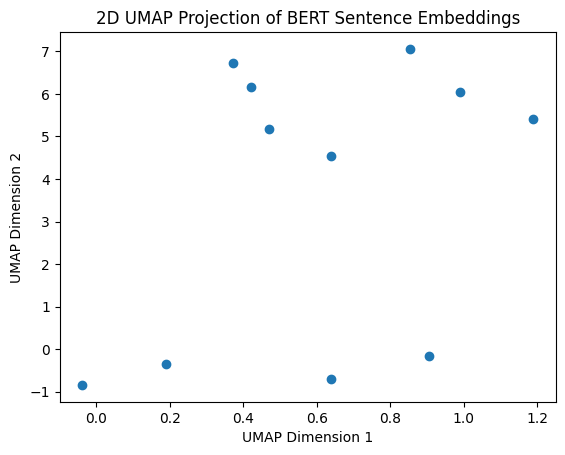

In [14]:
# 2D Visualization
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Adding labels and title for clarity
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('2D UMAP Projection of BERT Sentence Embeddings')

# Show the plot
plt.show()